In [1]:
#LIBRARIES
import pandas as pd  ## data manipulation
import numpy as np  ## mathematical Calculations

import seaborn as sns   ## for advance visualization
import matplotlib.pyplot as plt   ## for visualization

import scipy as sp
import os

from matplotlib import figure

## preprocessing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  ### for scaling
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  ### for converting categorical values in numerical
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import joblib

In [2]:
df = pd.read_csv('cleaned_anno_output.csv')


In [3]:
df.isna().sum()

Unnamed: 0         0
proto              0
src_IP_addr        0
src_pt             0
dst_IP_addr        0
dst_Pt             0
packets            0
bytes              0
HTTP_Host_OS       0
TCP_window_size    0
TCP_syn_size       0
TCP_TTL            0
HTTP_hostname      0
session_ID         0
Device_Category    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1048575 non-null  int64 
 1   proto            1048575 non-null  object
 2   src_IP_addr      1048575 non-null  object
 3   src_pt           1048575 non-null  int64 
 4   dst_IP_addr      1048575 non-null  object
 5   dst_Pt           1048575 non-null  int64 
 6   packets          1048575 non-null  int64 
 7   bytes            1048575 non-null  int64 
 8   HTTP_Host_OS     1048575 non-null  object
 9   TCP_window_size  1048575 non-null  int64 
 10  TCP_syn_size     1048575 non-null  int64 
 11  TCP_TTL          1048575 non-null  int64 
 12  HTTP_hostname    1048575 non-null  object
 13  session_ID       1048575 non-null  int64 
 14  Device_Category  1048575 non-null  object
dtypes: int64(9), object(6)
memory usage: 120.0+ MB


In [5]:
df[df['src_IP_addr']=='0'].value_counts().sum()

0

In [6]:
df[df['HTTP_Host_OS']=='0'].value_counts().sum()

875513

In [7]:
df[df['HTTP_hostname']=='0'].value_counts().sum()

172048

In [8]:
new_df = df[(df != '0').all(axis=1)]
new_df

,Unnamed: 0,proto,src_IP_addr,src_pt,dst_IP_addr,dst_Pt,packets,bytes,HTTP_Host_OS,TCP_window_size,TCP_syn_size,TCP_TTL,HTTP_hostname,session_ID,Device_Category
7,7,TCP,111.251.20.34,51276,195.113.232.83,80,6,507,iOS,65535,64,61,init-p01st.push.apple.com,31,MAC
22,22,TCP,111.251.22.253,56809,187.130.124.174,80,4,536,Android,65535,60,61,ANON,3891,Mobile Phone
26,26,TCP,111.251.25.212,32882,83.230.241.198,80,4,410,Android,29200,60,61,ANON,6,Mobile Phone
34,34,TCP,111.251.25.212,38599,83.230.241.198,80,6,533,Android,29200,60,61,ANON,6,Mobile Phone
45,45,TCP,111.251.28.43,48205,195.113.214.219,80,5,700,Android,65535,60,61,connectivitycheck.android.com,1,Mobile Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,1048543,TCP,111.251.20.24,56682,245.38.2.249,80,6,1564,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048550,1048550,TCP,111.251.20.24,41882,224.60.65.99,80,9,920,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048554,1048554,TCP,111.251.23.248,58182,214.60.136.209,80,15,5857,Windows,8192,52,125,ANON,13669,Windows_PC
1048562,1048562,TCP,111.251.31.190,65112,233.1.52.11,80,13,1644,Windows,8192,52,125,ANON,13503,Windows_PC


In [9]:
new_df['Device_Category'].value_counts()

Device_Category
Windows_PC      103244
Mobile Phone     33381
MAC              26632
Linux_PC          7078
MAC_PC            2520
MS_Phone           177
Name: count, dtype: int64

<Axes: xlabel='Device_Category', ylabel='count'>

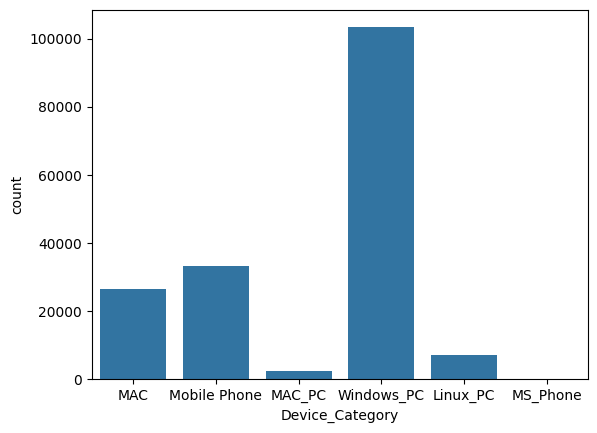

In [10]:
sns.countplot(x=new_df['Device_Category'], data=new_df)


In [11]:
new_df['HTTP_Host_OS'].value_counts()

HTTP_Host_OS
Windows          103243
Android           33318
Mac OS X          17871
iOS                8761
Ubuntu             4182
Linux              2720
Darwin             2520
Windows Phone       177
Fedora              146
BlackBerry           63
Debian               30
Windows CE            1
Name: count, dtype: int64

In [12]:
new_df

,Unnamed: 0,proto,src_IP_addr,src_pt,dst_IP_addr,dst_Pt,packets,bytes,HTTP_Host_OS,TCP_window_size,TCP_syn_size,TCP_TTL,HTTP_hostname,session_ID,Device_Category
7,7,TCP,111.251.20.34,51276,195.113.232.83,80,6,507,iOS,65535,64,61,init-p01st.push.apple.com,31,MAC
22,22,TCP,111.251.22.253,56809,187.130.124.174,80,4,536,Android,65535,60,61,ANON,3891,Mobile Phone
26,26,TCP,111.251.25.212,32882,83.230.241.198,80,4,410,Android,29200,60,61,ANON,6,Mobile Phone
34,34,TCP,111.251.25.212,38599,83.230.241.198,80,6,533,Android,29200,60,61,ANON,6,Mobile Phone
45,45,TCP,111.251.28.43,48205,195.113.214.219,80,5,700,Android,65535,60,61,connectivitycheck.android.com,1,Mobile Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,1048543,TCP,111.251.20.24,56682,245.38.2.249,80,6,1564,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048550,1048550,TCP,111.251.20.24,41882,224.60.65.99,80,9,920,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048554,1048554,TCP,111.251.23.248,58182,214.60.136.209,80,15,5857,Windows,8192,52,125,ANON,13669,Windows_PC
1048562,1048562,TCP,111.251.31.190,65112,233.1.52.11,80,13,1644,Windows,8192,52,125,ANON,13503,Windows_PC


Numerical Columns

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Unnamed: 0', 'src_pt', 'dst_Pt', 'packets', 'bytes', 'TCP_window_size',
       'TCP_syn_size', 'TCP_TTL', 'session_ID'],
      dtype='object')

Replacing every zero value with the mean value

In [14]:
for column in numerical_columns:
    mean_value = new_df[column].mean()
    new_df[column] = new_df[column].replace(0.0, mean_value)

C:\Users\Isra\AppData\Local\Temp\ipykernel_10060\143798225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = new_df[column].replace(0.0, mean_value)


In [15]:
new_df[new_df[new_df['HTTP_hostname']==0.0]].value_counts().sum()

0

In [16]:
categorical_columns = new_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['proto', 'src_IP_addr', 'dst_IP_addr', 'HTTP_Host_OS', 'HTTP_hostname',
       'Device_Category'],
      dtype='object')

In [17]:
new_df

,Unnamed: 0,proto,src_IP_addr,src_pt,dst_IP_addr,dst_Pt,packets,bytes,HTTP_Host_OS,TCP_window_size,TCP_syn_size,TCP_TTL,HTTP_hostname,session_ID,Device_Category
7,7,TCP,111.251.20.34,51276,195.113.232.83,80,6,507,iOS,65535,64,61,init-p01st.push.apple.com,31,MAC
22,22,TCP,111.251.22.253,56809,187.130.124.174,80,4,536,Android,65535,60,61,ANON,3891,Mobile Phone
26,26,TCP,111.251.25.212,32882,83.230.241.198,80,4,410,Android,29200,60,61,ANON,6,Mobile Phone
34,34,TCP,111.251.25.212,38599,83.230.241.198,80,6,533,Android,29200,60,61,ANON,6,Mobile Phone
45,45,TCP,111.251.28.43,48205,195.113.214.219,80,5,700,Android,65535,60,61,connectivitycheck.android.com,1,Mobile Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,1048543,TCP,111.251.20.24,56682,245.38.2.249,80,6,1564,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048550,1048550,TCP,111.251.20.24,41882,224.60.65.99,80,9,920,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048554,1048554,TCP,111.251.23.248,58182,214.60.136.209,80,15,5857,Windows,8192,52,125,ANON,13669,Windows_PC
1048562,1048562,TCP,111.251.31.190,65112,233.1.52.11,80,13,1644,Windows,8192,52,125,ANON,13503,Windows_PC


In [18]:
new_df.drop('Unnamed: 0',axis=1, inplace=True)

C:\Users\Isra\AppData\Local\Temp\ipykernel_10060\4160590271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('Unnamed: 0',axis=1, inplace=True)


In [19]:
new_df

,proto,src_IP_addr,src_pt,dst_IP_addr,dst_Pt,packets,bytes,HTTP_Host_OS,TCP_window_size,TCP_syn_size,TCP_TTL,HTTP_hostname,session_ID,Device_Category
7,TCP,111.251.20.34,51276,195.113.232.83,80,6,507,iOS,65535,64,61,init-p01st.push.apple.com,31,MAC
22,TCP,111.251.22.253,56809,187.130.124.174,80,4,536,Android,65535,60,61,ANON,3891,Mobile Phone
26,TCP,111.251.25.212,32882,83.230.241.198,80,4,410,Android,29200,60,61,ANON,6,Mobile Phone
34,TCP,111.251.25.212,38599,83.230.241.198,80,6,533,Android,29200,60,61,ANON,6,Mobile Phone
45,TCP,111.251.28.43,48205,195.113.214.219,80,5,700,Android,65535,60,61,connectivitycheck.android.com,1,Mobile Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,TCP,111.251.20.24,56682,245.38.2.249,80,6,1564,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048550,TCP,111.251.20.24,41882,224.60.65.99,80,9,920,Ubuntu,29200,60,61,ANON,13761,Linux_PC
1048554,TCP,111.251.23.248,58182,214.60.136.209,80,15,5857,Windows,8192,52,125,ANON,13669,Windows_PC
1048562,TCP,111.251.31.190,65112,233.1.52.11,80,13,1644,Windows,8192,52,125,ANON,13503,Windows_PC


In [20]:
new_df['Device_Category'].value_counts()

Device_Category
Windows_PC      103244
Mobile Phone     33381
MAC              26632
Linux_PC          7078
MAC_PC            2520
MS_Phone           177
Name: count, dtype: int64

ENCODING

In [21]:
for column in categorical_columns:
    label_Encode = LabelEncoder()
    new_df[column] = label_Encode.fit_transform(new_df[column])

C:\Users\Isra\AppData\Local\Temp\ipykernel_10060\793897344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = label_Encode.fit_transform(new_df[column])
C:\Users\Isra\AppData\Local\Temp\ipykernel_10060\793897344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = label_Encode.fit_transform(new_df[column])
C:\Users\Isra\AppData\Local\Temp\ipykernel_10060\793897344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [22]:
new_df

,proto,src_IP_addr,src_pt,dst_IP_addr,dst_Pt,packets,bytes,HTTP_Host_OS,TCP_window_size,TCP_syn_size,TCP_TTL,HTTP_hostname,session_ID,Device_Category
7,0,542,51276,5224,80,6,507,11,65535,64,61,25,31,1
22,0,717,56809,3548,80,4,536,0,65535,60,61,1,3891,4
26,0,980,32882,11656,80,4,410,0,29200,60,61,1,6,4
34,0,980,38599,11656,80,6,533,0,29200,60,61,1,6,4
45,0,1242,48205,5207,80,5,700,0,65535,60,61,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,0,533,56682,8540,80,6,1564,7,29200,60,61,1,13761,0
1048550,0,533,41882,7116,80,9,920,7,29200,60,61,1,13761,0
1048554,0,810,58182,6599,80,15,5857,8,8192,52,125,1,13669,5
1048562,0,1488,65112,7890,80,13,1644,8,8192,52,125,1,13503,5


In [23]:
new_df['Device_Category'].value_counts()


Device_Category
5    103244
4     33381
1     26632
0      7078
2      2520
3       177
Name: count, dtype: int64

In [24]:
new_df['HTTP_Host_OS'].value_counts()

HTTP_Host_OS
8     103243
0      33318
6      17871
11      8761
7       4182
5       2720
2       2520
10       177
4        146
1         63
3         30
9          1
Name: count, dtype: int64

In [36]:
Y = new_df[['Device_Category']]
X = new_df.drop(columns=['Device_Category'], inplace = False)

Training the dataset

In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Isra\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [38]:
Y

,Device_Category
7,1
22,4
26,4
34,4
45,4
...,...
1048543,0
1048550,0
1048554,5
1048562,5


In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_re, y_re = sm.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_re, y_re, test_size =0.25)
X.head()
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)


,proto,src_IP_addr,src_pt,dst_IP_addr,dst_Pt,packets,bytes,HTTP_Host_OS,TCP_window_size,TCP_syn_size,TCP_TTL,HTTP_hostname,session_ID
7,0,542,51276,5224,80,6,507,11,65535,64,61,25,31
22,0,717,56809,3548,80,4,536,0,65535,60,61,1,3891
26,0,980,32882,11656,80,4,410,0,29200,60,61,1,6
34,0,980,38599,11656,80,6,533,0,29200,60,61,1,6
45,0,1242,48205,5207,80,5,700,0,65535,60,61,11,1


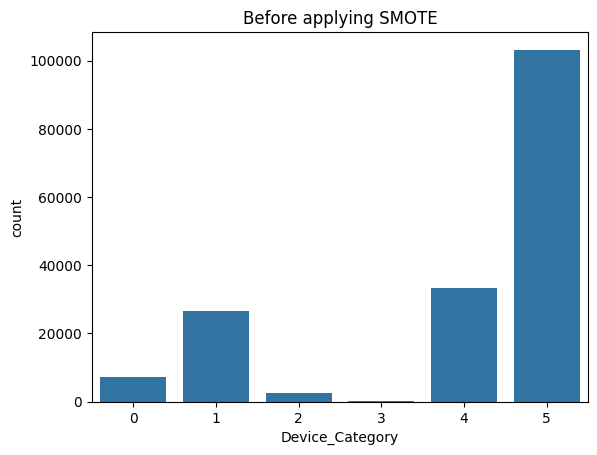

In [39]:
sns.countplot(x ='Device_Category',data = Y)
plt.title('Before applying SMOTE')
plt.show()

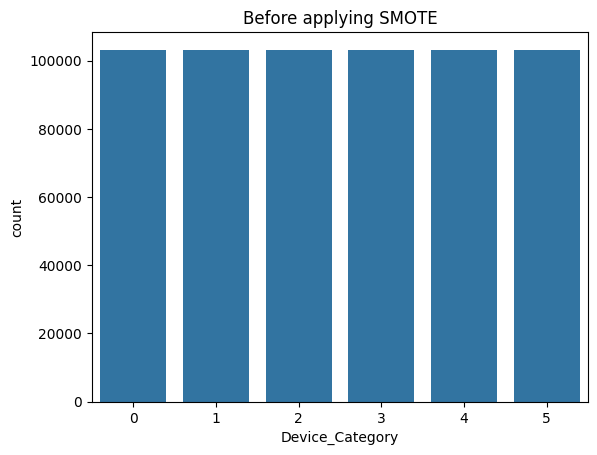

In [40]:
sns.countplot(x ='Device_Category',data = y_re)
plt.title('Before applying SMOTE')
plt.show()

MODELS

Logistic Regression model

In [41]:

model = LogisticRegression()

In [42]:
model.fit(X_train, Y_train)

c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = model.predict(X_test)
score = accuracy_score(Y_test, y_pred) # actual answer was Y_test and calculated answer was y_pred. we compare both for accuracy
accuracy = score*100
print("Accuracy:",accuracy)

Accuracy: 46.40011364663645


Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train, Y_train)



c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [45]:
y_pred1 = model1.predict(X_test)
score = accuracy_score(Y_test, y_pred1) # actual answer was Y_test and calculated answer was y_pred. we compare both for accuracy
accuracy = score*100
print(accuracy)

99.99870856094947


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.78     25813
           1       0.39      0.39      0.39     25869
           2       0.34      0.38      0.36     25769
           3       0.00      0.00      0.00     25473
           4       0.30      0.41      0.35     26093
           5       0.69      0.90      0.78     25849

    accuracy                           0.46    154866
   macro avg       0.44      0.46      0.44    154866
weighted avg       0.44      0.46      0.44    154866

Confusion Matrix
[[17884   212   483  5240  1237   757]
 [  278 10054  6275  2170  7051    41]
 [    0  6655  9902  1292  7920     0]
 [    0  4376  6550    34  7600  6913]
 [ 1572  4111  5609  1481 10666  2654]
 [  481   138   150  1039   723 23318]]


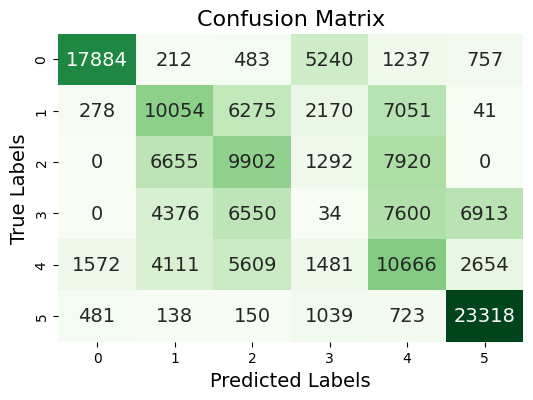

In [47]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

from sklearn.metrics import confusion_matrix

# PRINT THE CONFUSION MATRIX
print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens', cbar = False, annot_kws = {'size' : 14})
plt.xlabel('Predicted Labels', fontsize = 14)
plt.ylabel('True Labels', fontsize = 14)
plt.title('Confusion Matrix', fontsize =16)
plt.show()

In [65]:
y_pred

array([5, 5, 5, ..., 5, 5, 5])

SVM

In [48]:
model2=SVC()
model2.fit(X_train,Y_train)

c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_pred2 = model2.predict(X_test)
score = accuracy_score(Y_test, y_pred2) # actual answer was Y_test and calculated answer was y_pred. we compare both for accuracy
accuracy = score*100
print("Accuracy:",accuracy)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred2))


Accuracy: 87.21392574783854
Confusion Matrix:
[[ 1607    29     0     0    95    39]
 [    8  6446     0     0   193    11]
 [    0   618     0     0    12     0]
 [    0    26     0     0     0    18]
 [  348  2868     0     0  4676   453]
 [    0   591     0     0   222 24998]]


Prediction on test dataset

In [49]:
file_path = "svm_model.pkl"
joblib.dump(model, file_path)

['svm_model.pkl']

In [50]:
file_path = "svm_model.pkl"
svm_model = joblib.load(file_path)

In [51]:
Y_test

680245     5
1021076    5
108648     5
77603      5
823698     5
          ..
176453     5
332299     1
205831     5
964943     5
920265     5
Name: Device_Category, Length: 43258, dtype: int32